# Jeff Data Science test

## Data Science Test
### Technical questions:
1) Build a script (R, Python, SQL...) to create a cohort of Signup to First Order and show the result. The objective of this cohort is to see, out of the users that signed up in Week N, how many did their first order in Week N+1, N+2, N+3... As an input, you have 2 tables : - one with user_id, signup_timestamp - and a second one with user_id, order_timestamp

### ANSWER
I created a simple dummy dataset. It is possible that the real-life data would include multiple years and multiple order timestamps, incorrect or missing data. Data preprocessing step would take care of all the possible issues.

In [2]:
# import of the libraries
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# create artificial dataset for the data science task
first_date=datetime.datetime(2019,1,1)
last_date=datetime.datetime(2019,9,30)
data_points=1000

table_1 = pd.DataFrame({
        'user_id' : np.random.choice(range(data_points), data_points, replace=False),
        'signup_timestamp' : [np.random.choice(pd.date_range(first_date,last_date)) for i in range(data_points)]
        })
table_2 = pd.DataFrame({
        'user_id' : table_1.user_id.copy(),
        'order_timestamp' : table_1.signup_timestamp + pd.to_timedelta(np.random.randint(70, size=data_points), unit='day')
        })

In [60]:
# merge tables and convert date tiems to weeks
merged_tables = table_1.merge(table_2, on='user_id')

merged_tables['signup_week'] = merged_tables.signup_timestamp.dt.week
merged_tables['order_week'] = merged_tables.order_timestamp.dt.week
merged_tables['order_week_ref'] = merged_tables['order_week'] - merged_tables['signup_week']

# pivot the table
result_table = merged_tables.pivot_table(index='signup_week', columns='order_week_ref', values='order_week', aggfunc=len, fill_value=0)

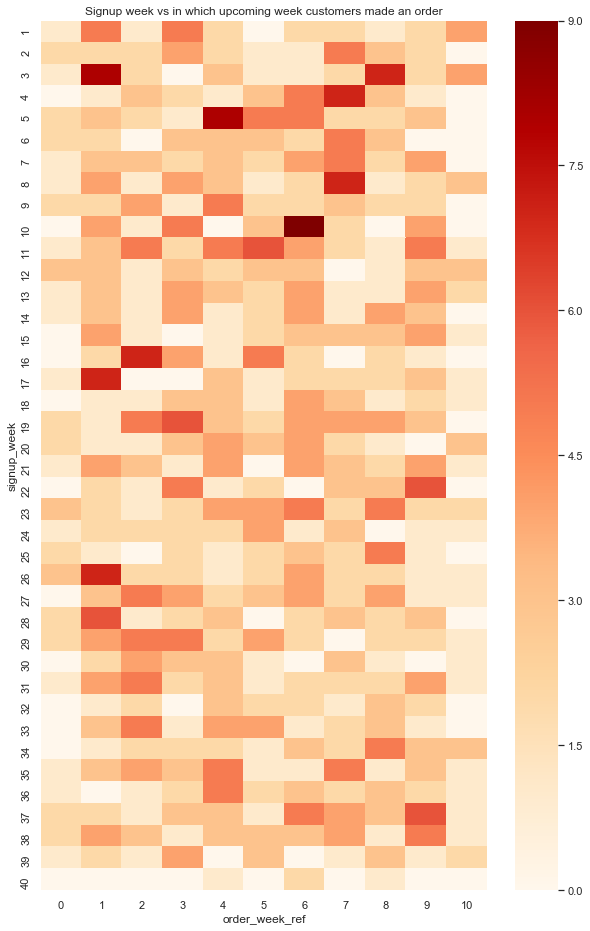

In [84]:
# create a nice heatmap
plt.figure(figsize=(10, 16))
plt.title('Signup week vs in which upcoming week customers made an order')
sns.heatmap(final,cmap='OrRd')

### Business questions:
2) Mr Jeff is growing very fast! We need many data to make good decisions. As Country Manager you need to evaluate what is the best country to achieve. Please argue your response based on economics, politics, potential for growth... Choose one country where Mr Jeff isn ́t yet.

### ANSWER:  

How about Japan? Immigration and tourism is rising in Japan in last couple of years. Tourists do not have a time to clean their clothes and citizens spend most of the time at work or commuting. There is also lack of space for srying clothes and in specific season - like rainy season in summer, it is almost impossible to dry your clothes. People in Japan prefer services where they do not have personal contact with anybody, e.g. order/pay food in machine outside restaurant and then just sit inside. There are more and more old people that are unable to wash their clothes. Politically the Japan is slowly opening its borders to the rest of the world and foreign companies and there is a lack of english speaking services - including dry cleaning. There will be summer olympics in Japan this year which could be a way to promote the Mr.Jeff service at least with couple of stores and fliers. I could continue with many more arguments...  

"There are only few dry-cleaners that provide their services in English. The following is a list of English-speaking dry-cleaners in Tokyo."  
https://origami-book.com/column/course-en/14370  

"The estimated number of foreign visitors to Japan in the first six months of 2019 increased by 4.6% from 2018, hitting a new record of 16.6 million, according to data released by the Japan National Tourist Organization."  
https://www.nippon.com/en/japan-data/h00509/international-visitors-to-japan-increase-again-in-first-half-of-2019.html  

### Technical/business presentation:
3) We would love to see your presentation skills. The idea is:
* Prepare a presentation about one of your model developed before. (requirements,
challenges, objectives, techniques, conclusions...)
* Talk (English) about it during 30 min to a business public. Also the head of data.

### ANSWER:
The presentation is created in Prezi. See file :  
PREZI_Stream-based_Machine_Learning_for_Network_Security_and_Anomaly_Detection.exe  

## Start-up of machine learning.
## (Translated from Spanish to English)

### Section 1:
The Partner Success department would like to predict predicting the NPS of each
Jeff franchise. After much work by the Data Scientist, they have asked for help to
that franchises can see that information in real time from their backoffice. The
Data Scientist team has given us a Linearl.pkl file whose entries are:

good_comment_number = 311  
num_comments_malos = 114  
number_franquicias_cercanas = 2  
personal_number = 3  
city ​​= 8 (1 Madrid, 2 Barcelona, ​​3- Bogota, ...)  
franchise = 2 (zone1, zone2, ...)  
previous_message_improvement = 1 (no 0, yes 1)  

In order for the backoffice department to integrate the results, it needs to connect to an API whose response is a value [0,1] similar to {'result': '0.33'}. This answer appears when the entries are passed to the model. They also require an answer that offers the health status of api. The use of Python and Github in the solution is preferred.

### ANSWER:

If I understood the task correctly I was supposed to post a pickle file to API and get confirmation and then schedule the script in Jenkins.

* I emulated the API by my-json-server.typicode.com and github db.json file
* scheduled the script in Jenkins

In [113]:
# create a file from Data scientist team
import requests
Linearl = pd.DataFrame({'good_comment_number' : [311],
                        'num_comments_malos' : [114],
                        'number_franquicias_cercanas' : [2],
                        'personal_number' : [3],
                        'city' : [8],
                        'franchise' : [2],
                        'previous_message_improvement' : [5]})
Linearl.to_pickle('Linearl.pkl')

In [123]:
url = 'https://my-json-server.typicode.com/5uperpalo/mrjeff_assignment_server'
Linearl = pd.read_pickle('Linearl.pkl')

post_data = requests.post(url, data = Linearl.to_json())
url_test = requests.get(url).status_code

#print the response text (the content of the requested file):
if post_data == 200:
    print('0')
else:
    print('1')

if url_test == 200:
    print('API URL is healthy')
else: 
    print('API URL is not healthy!!!')

0
API URL is healthy


### Section 2:
Create a Job in Jenkins to put it into production.

### ANSWER
* I installed Jenkins
* created the job
* defined path to git
* defined cmd.exe (shell)
* defined the github repository : https://github.com/5uperpalo/mrjeff_assignment_server
* defined script to run : python script.py

log:  

    Started by user Ramon Ramirez  
    Running as SYSTEM  
    Building in workspace C:\Program Files (x86)\Jenkins\workspace\mr_jeff_assignment  
    No credentials specified  
     > C:\Program Files\Git\cmd\git.exe rev-parse --is-inside-work-tree # timeout=10  
    Fetching changes from the remote Git repository  
     > C:\Program Files\Git\cmd\git.exe config remote.origin.url https://github.com/5uperpalo/mrjeff_assignment_server #  timeout=10  
    Fetching upstream changes from https://github.com/5uperpalo/mrjeff_assignment_server  
     > C:\Program Files\Git\cmd\git.exe --version # timeout=10  
     > C:\Program Files\Git\cmd\git.exe fetch --tags --force --progress -- https://github.com/5uperpalo  /mrjeff_assignment_server +refs/heads/*:refs/remotes/origin/* # timeout=10  
     > C:\Program Files\Git\cmd\git.exe rev-parse "refs/remotes/origin/master^{commit}" # timeout=10  
     > C:\Program Files\Git\cmd\git.exe rev-parse "refs/remotes/origin/origin/master^{commit}" # timeout=10  
    Checking out Revision aceedf0dc940c18245b25c11b0807bbe32c31aa1 (refs/remotes/origin/master)  
     > C:\Program Files\Git\cmd\git.exe config core.sparsecheckout # timeout=10  
     > C:\Program Files\Git\cmd\git.exe checkout -f aceedf0dc940c18245b25c11b0807bbe32c31aa1 # timeout=10  
    Commit message: "Create script.py"  
     > C:\Program Files\Git\cmd\git.exe rev-list --no-walk aceedf0dc940c18245b25c11b0807bbe32c31aa1 # timeout=10  
    [mr_jeff_assignment] $ C:\Windows\system32\cmd.exe -xe C:\Windows\TEMP\jenkins1429759233650953207.sh  
    Microsoft Windows [Version 10.0.18362.592]  
    (c) 2019 Microsoft Corporation. All rights reserved.  

     C:\Program Files (x86)\Jenkins\workspace\mr_jeff_assignment>Finished: SUCCESS  

### Section 3:
How would you define a production start-up flow of a model that is re-trained automatically. Infrastructure, tools, etc.

### ANSWER:
#### 3.1
I would implement the model in AWS/Azure. I would periodically recalculate the model when I have more data, evaluate it, and possibly adjust model parameters to give better predictions. Re-calculation/Re-evaluaiton would depend on the amount of the data that I will decide to use.  
More recent data would give us better results for recent trends and historical data would give us better results for overall trends. Both model types can be used in parallel.

#### 3.2
Stream-based machine learning models with ADWIN are good choice for anomaly/fraud detection - in this case the model is re-trained "on the fly".  

#### 3.3
It is possible that in case of Mr.Jeff the low-latency/high-throughput machine learning model evaluation would be important with increasing size of company. In that case, I would follow these guidelines:
* ML doployment : https://www.slideshare.net/0xdata/realtime-ai-designing-for-low-latency-and-high-throughput-dr-sergei-izrailev-h2o-ai-world-london-2018
* training : PYSPARK
* scoring : batch, possibly hybrid with partially precomputed model/features
* ML training : H2O driverless AI
* infrastructure : AWS
* transformations and ML scoring : PYSPARKLING and MOJO2

